<a href="https://colab.research.google.com/github/rehgend/EksplorasiHyperparameterCNN_NN/blob/main/Tugas%201A%20-%20Klasifikasi%20pada%20Dataset%20CIFAR10%20dengan%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Tugas 1A - Klasifikasi pada Dataset CIFAR10 dengan CNN**
### **<center>Rahman Indra Kesuma - 33221026**

**Tahapan 1.** Memuat library yang dibutuhkan dalam pemrosesan data hingga proses pembelajaran pada Dataset CIFAR10 dengan menggunakan algoritma Convolutional Neural Network.

In [ ]:
# Library yang digunakan untuk pengolahan data dan load data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Library yang digunakan untuk membuat model dengan arsitektur CNN
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten

# Library yang digunakan untuk pemilihan optimizer yang digunakan
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam

**Tahapan 2.** Memuat dataset CIFAR10 dari Keras Built-In Small Dataset sekaligus menampilkan beberapa sample dari data training yang telah berhasil dimuat.

In [ ]:
# Memuat dataset dataset yang akan dilakukan Classification Learning
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (remaining_images, remaining_labels) = cifar10.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
remaining_images = (np.expand_dims(remaining_images, axis=-1)/255.).astype(np.float32)
remaining_labels = (remaining_labels).astype(np.int64)

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# Melakukan pembagian dari data testing menjadi dua kelompok data, yaitu validation data dan testing data
valid_images, test_images, valid_labels, test_labels = train_test_split(remaining_images, remaining_labels, test_size=0.5)

print("Ukuran Training Data -> ", train_images.shape)
print("Ukuran Validation Data -> ", valid_images.shape)
print("Ukuran Testing Data -> ", test_images.shape)

Ukuran Training Data ->  (50000, 32, 32, 3, 1)
Ukuran Validation Data ->  (5000, 32, 32, 3, 1)
Ukuran Testing Data ->  (5000, 32, 32, 3, 1)


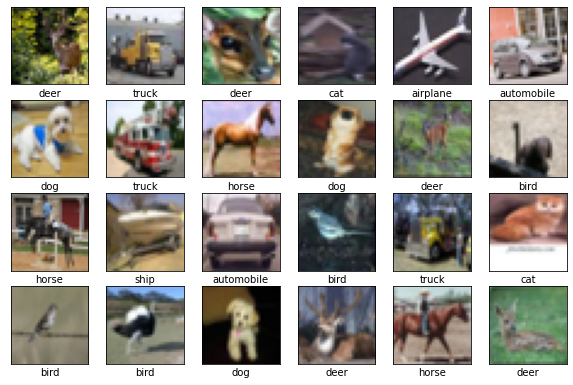

In [ ]:
# Proses untuk menampilkan sample dari 50000 data training yang ada yang dipilih secara random 24 gambar
label_gambar = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
random_inds = np.random.choice(50000,24)
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(label_gambar[train_labels[image_ind][0]])

**Tahapan 3**. Pendefinisian fungsi untuk membentuk arsitektur CNN dengan parameter yang berubah yaitu:
1.   Jumlah Convolutional Layer (*NumConvLayer*)
2.   Ukuran Filter (*FilterSize*)
3.   Jumlah Filter (*NumFilter*)
4.   Banyaknya hidden unit pada Fully-Connected Layer (*NumHiddenUnit*)



In [ ]:
def build_cnn_model(NumConvLayer, FilterSize, NumFilter, NumHiddenUnit):
  cnn_model = Sequential()
  
  cnn_model.add(Conv2D(filters=NumFilter, kernel_size=(FilterSize,FilterSize), activation=tf.nn.relu, input_shape=(32, 32, 3)))
  cnn_model.add(MaxPool2D(pool_size=(2,2)))
  
  for i in range(0, NumConvLayer-1):
    NumFilter = NumFilter * 2
    cnn_model.add(Conv2D(filters=NumFilter, kernel_size=(FilterSize,FilterSize), activation=tf.nn.relu))
    cnn_model.add(MaxPool2D(pool_size=(2,2)))
  
  cnn_model.add(Flatten())
  cnn_model.add(Dense(NumHiddenUnit, activation=tf.nn.relu))
  cnn_model.add(Dense(10, activation='softmax'))
  
  return cnn_model

**Tahapan 4.** Percobaan untuk melakukan pencarian ukuran filter (FilterSize) yang terbaik

In [ ]:
#Definisi Awal NumConvLayer=1
#Definisi Awal FilterSize=3
#Definisi Awal NumFilter=32
#Definisi Awal NumHiddenUnit=128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for FilterSizeFind in range(1, 10, 2):
  model_percobaan1 = build_cnn_model(1,FilterSizeFind,32,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan1.summary()
  model_percobaan1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan1.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        128       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1048704   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,050,122
Trainable params: 1,050,122
Non-trainable params: 0
____________________________________________

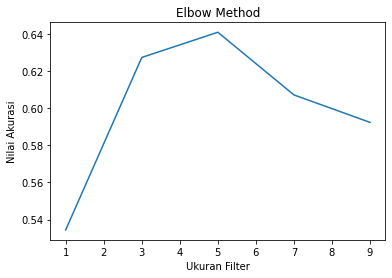

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Ukuran Filter
plt.plot(range(1, 10, 2), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Ukuran Filter')
plt.ylabel('Nilai Akurasi')
plt.show()

**Tahapan 5.** Percobaan untuk melakukan pencarian jumlah filter (NumFilter) yang terbaik

In [ ]:
#Definisi Awal NumConvLayer = 1
#Nilai Terbaik FilterSize = 5
#Pencarian nilai NumFilter = 8, 16, 32, 64, 128
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
NumFilterFind = 8
for NumFilterTry in range(1, 6):
  model_percobaan2 = build_cnn_model(1,5,NumFilterFind,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan2.summary()
  model_percobaan2.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan2.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)
  NumFilterFind = NumFilterFind * 2

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1568)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               200832    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 202,730
Trainable params: 202,730
Non-trainable params: 0
_______________________________________________

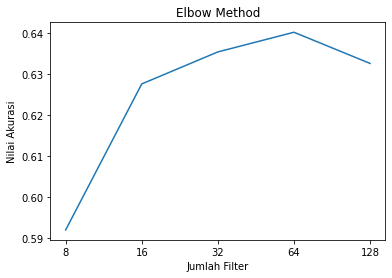

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Filter
plt.plot(['8','16','32','64','128'], validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Filter')
plt.ylabel('Nilai Akurasi')
plt.show()

**Tahapan 6.** Percobaan untuk melakukan pencarian jumlah convolutional layer (NumConvLayer) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5 dan Jumlah Filter sebanyak 32.

In [ ]:
#Pencarian Nilai NumConvLayer = 1, 2, 3, 4, 5 (Namun nilai jumlah conv layer 3, 4, dan 5 tidak bisa dilakukan karena ukuran dimensi gambar yang sudah sangat kecil)
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik(1) NumFilter = 32
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for NumConvLayerFind in range(1, 3):
  model_percobaan3 = build_cnn_model(NumConvLayerFind,5,32,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan3.summary()
  model_percobaan3.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan3.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 806,666
Trainable params: 806,666
Non-trainable params: 0
________________________________________________

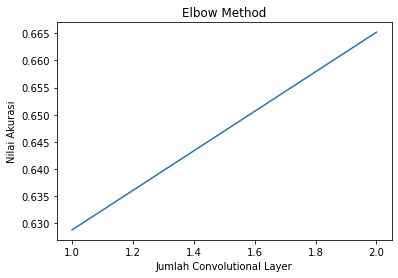

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Convolutional Layer
# dengan Nilai Jumlah Filter 32
plt.plot(range(1, 3), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Convolutional Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

**Tahapan 7.** Percobaan untuk melakukan pencarian jumlah convolutional layer (NumConvLayer) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5 dan Jumlah Filter sebanyak 64.

In [ ]:
#Pencarian Nilai NumConvLayer = 1, 2, 3, 4, 5 (Namun nilai jumlah conv layer 3, 4, dan 5 tidak bisa dilakukan karena ukuran dimensi gambar yang sudah sangat kecil)
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik(2) NumFilter = 64
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for NumConvLayerFind in range(1, 3):
  model_percobaan4 = build_cnn_model(NumConvLayerFind,5,64,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan4.summary()
  model_percobaan4.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan4.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 12544)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               1605760   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,611,914
Trainable params: 1,611,914
Non-trainable params: 0
___________________________________________

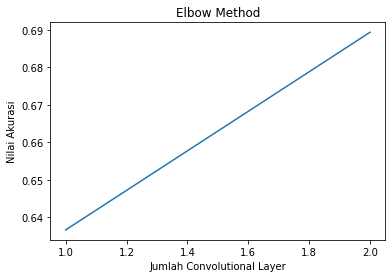

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Convolutional Layer
# dengan Nilai Jumlah Filter 64
plt.plot(range(1, 3), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Convolutional Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

**Tahapan 8.** Percobaan untuk melakukan pencarian jumlah convolutional layer (NumConvLayer) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5 dan Jumlah Filter sebanyak 128.

In [ ]:
#Pencarian Nilai NumConvLayer = 1, 2, 3, 4, 5 (Namun nilai jumlah conv layer 3, 4, dan 5 tidak bisa dilakukan karena ukuran dimensi gambar yang sudah sangat kecil)
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik(3) NumFilter = 128
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for NumConvLayerFind in range(1, 3):
  model_percobaan5 = build_cnn_model(NumConvLayerFind,5,128,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan5.summary()
  model_percobaan5.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan5.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 25088)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               3211392   
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,222,410
Trainable params: 3,222,410
Non-trainable params: 0
___________________________________________

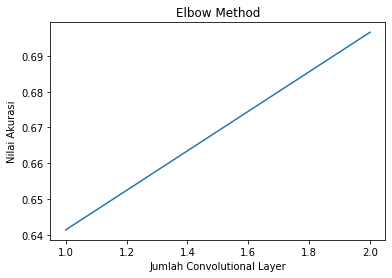

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Convolutional Layer
# dengan Nilai Jumlah Filter 128
plt.plot(range(1, 3), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Convolutional Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

**Tahapan 9.** Percobaan untuk melakukan pencarian jumlah neuron pada hidden layer (NumHiddenUnit) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5, Jumlah Filter sebanyak 128 dan Banyaknya Convolutional Layer adalah 2.

In [ ]:
#Nilai Terbaik NumConvLayer = 2
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik NumFilter = 128
#Pencarian Nilai NumHiddenUnit = 32, 64, 128, 256, 512

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
NumHiddenUnitFind = 32

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
NumHiddenUnitFind = 64

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
NumHiddenUnitFind = 128

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
NumHiddenUnitFind = 256

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [ ]:
NumHiddenUnitFind = 512

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_8 (Dense)             (None, 512)              

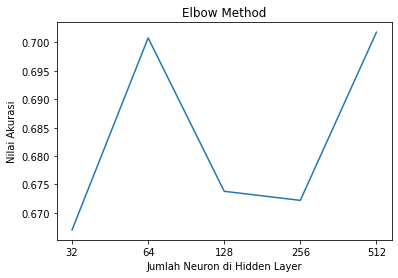

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Neuron pada Hidden Layer
plt.plot(['32','64','128','256','512'], validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Neuron di Hidden Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

**Tahapan 10.** Percobaan untuk melakukan pencarian Jenis Optimizer yang terbaik dari lima pilihan optimizer yang didefinisikan (RMSprop, Adam, Adadelta, Adagrad, dan SGD+Momentum), dengan pertimbangan nilai Ukuran Filter 5x5, Jumlah Filter sebanyak 128, Banyaknya Convolutional Layer adalah 2 (128 dan 256 NumFilter), dan 512 Neuron di Hidden Layer.

In [ ]:
#Nilai Terbaik NumConvLayer = 2
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik NumFilter = 128 pada Conv1 dan 256 pada Conv2
#Pencarian Nilai NumHiddenUnit = 512

BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_rmsprop_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 512)               3

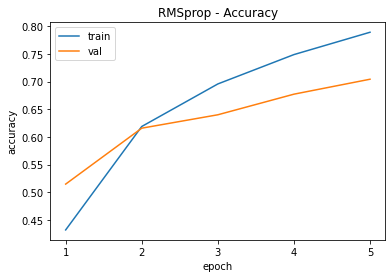

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer RMSprop
plt.plot(['1','2','3','4','5'], history_rmsprop_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_rmsprop_training.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adadelta(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adadelta_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

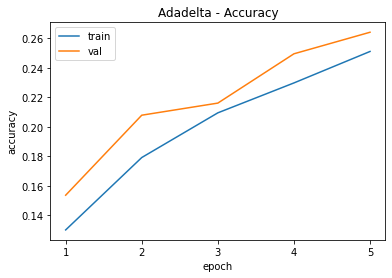

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adadelta
plt.plot(['1','2','3','4','5'], history_adadelta_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adadelta_training.history['val_accuracy'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adagrad(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adagrad_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

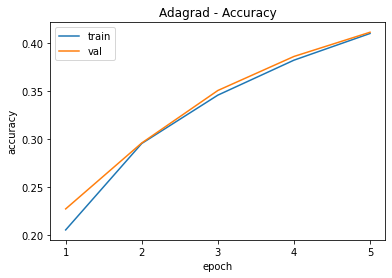

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adagrad
plt.plot(['1','2','3','4','5'], history_adagrad_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adagrad_training.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = SGD(learning_rate=0.001, momentum=0.5)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_sgd_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_8 (Dense)             (None, 512)              

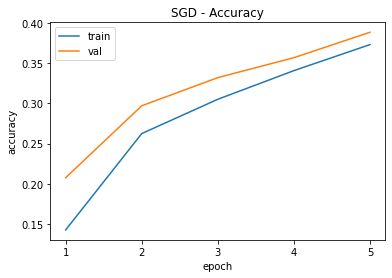

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer SQD+Momentum
plt.plot(['1','2','3','4','5'], history_sgd_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_sgd_training.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adam(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adam_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                                 
 dense_10 (Dense)            (None, 512)              

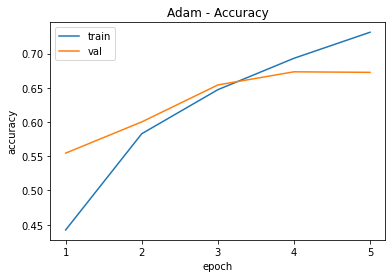

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adam
plt.plot(['1','2','3','4','5'], history_adam_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adam_training.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adamax(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adamax_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 512)              

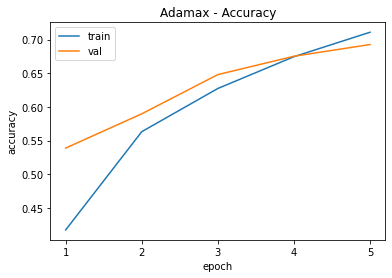

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adamax
plt.plot(['1','2','3','4','5'], history_adamax_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adamax_training.history['val_accuracy'])
plt.title('Adamax - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adamax-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Nadam(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_nadam_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6400)              0         
                                                                 
 dense_14 (Dense)            (None, 512)              

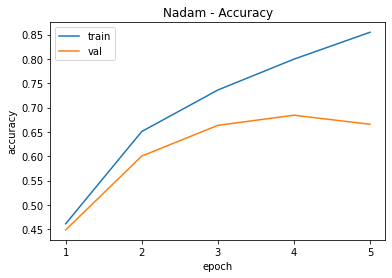

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Nadam
plt.plot(['1','2','3','4','5'], history_nadam_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_nadam_training.history['val_accuracy'])
plt.title('Nadam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Nadam-Accuracy.jpg')
plt.show()

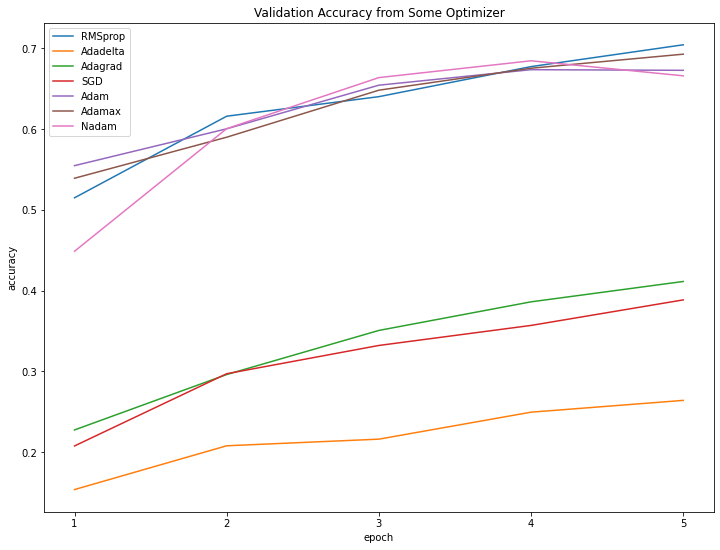

In [ ]:
# Ploting Hasil Eksplorasi dari Penerapan Beberapa Optimizer Terhadap Akurasi pada Validation Data
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)

plt.plot(['1','2','3','4','5'], history_rmsprop_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adadelta_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adagrad_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_sgd_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adam_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adamax_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_nadam_training.history['val_accuracy'])
plt.title('Validation Accuracy from Some Optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adadelta', 'Adagrad', 'SGD', 'Adam', 'Adamax', 'Nadam'])
plt.savefig('Val-Accuracy-All-Optimizer.jpg')
plt.show()